In [12]:
# Importation des bibliothèques nécessaire

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

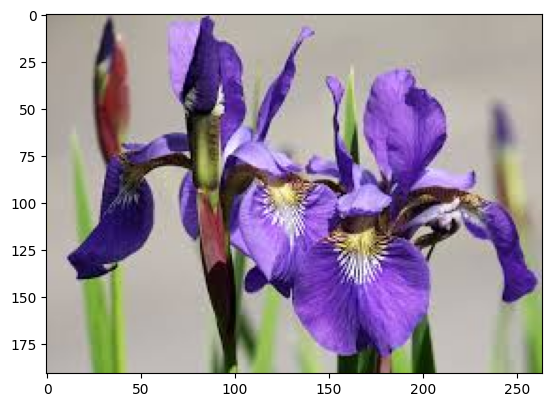

In [13]:
from skimage import io

photo = io.imread('photo.jpeg')
plt.imshow(photo)
plt.show()

In [14]:
# Explorer l'ensemble des données dans la bibliothèque seaborn

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [15]:
# Charger le jeux de données iris

data = sns.load_dataset('iris')

# Afficher les 5 premiere lignes

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
#Afficher la dimension de iris

data.shape

(150, 5)

In [17]:
# Information geraral sur les données

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
# Verifier si il ya de duplication

data.duplicated().sum()

1

In [19]:
# Voir si ya les données manquantent

data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

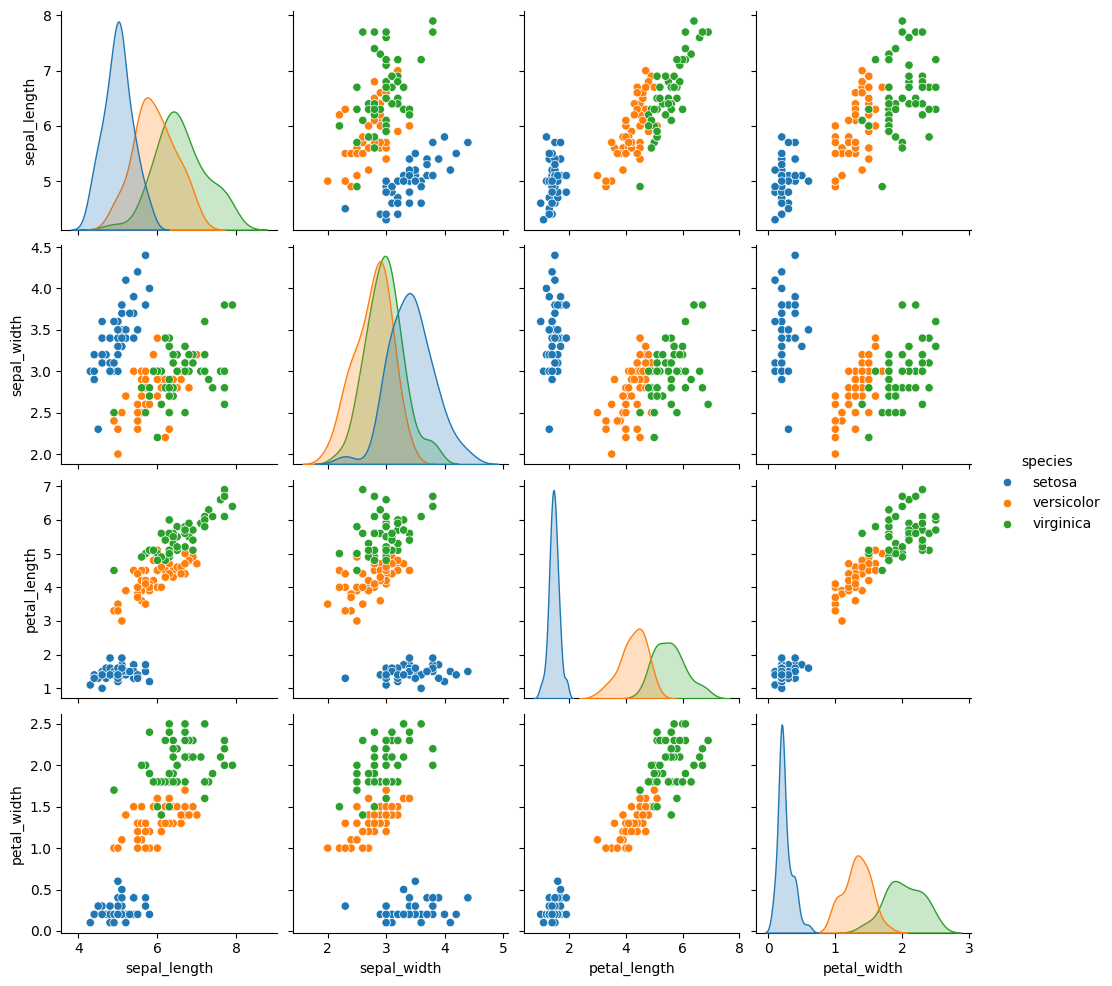

In [20]:
# Analyse exploratoire des données (EDA)

sns.pairplot(data, hue='species')

In [21]:
# Statistiques descriptives

data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


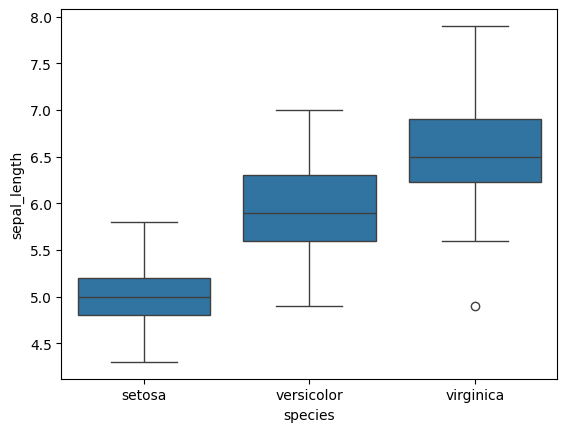

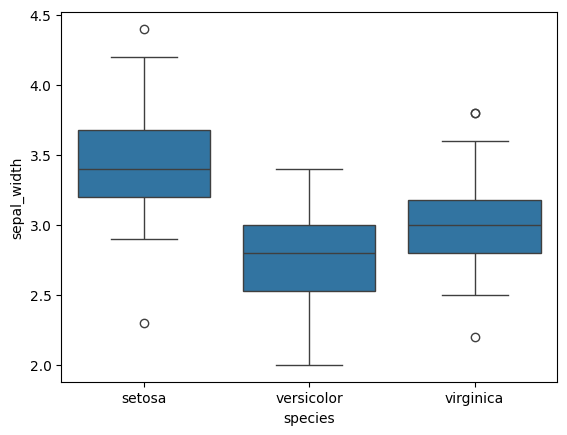

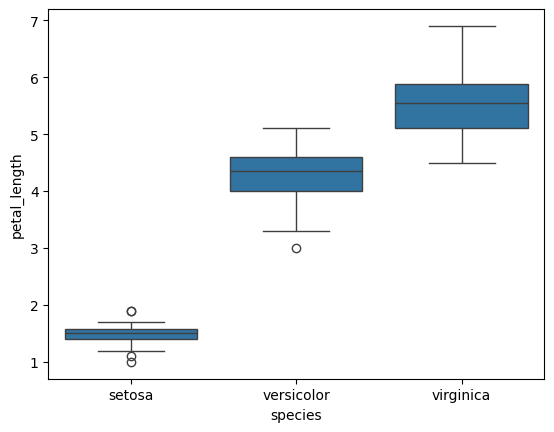

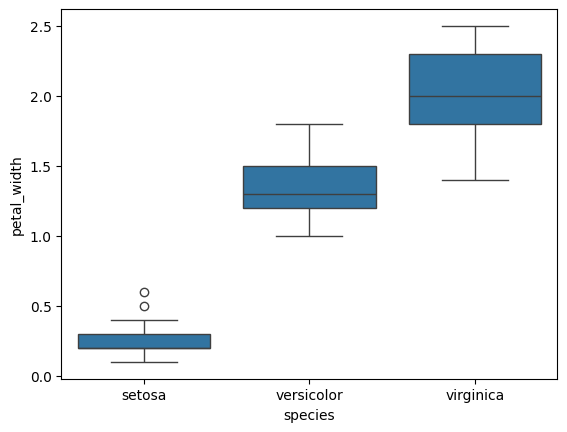

In [22]:
# Boxplot par rapport à la variable **Species**

col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in col:
    sns.boxplot(data=data, x='species', y=i)
    plt.show()


In [23]:
# Effectif de **Spicies**

data.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

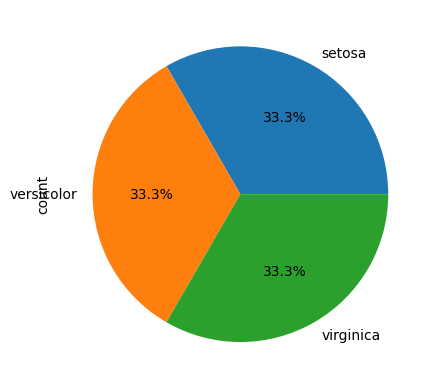

In [24]:
# Diagramme circulaire

data.species.value_counts().plot(kind='pie', autopct='%1.1f%%');

In [25]:
# Correlation

data[col].corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


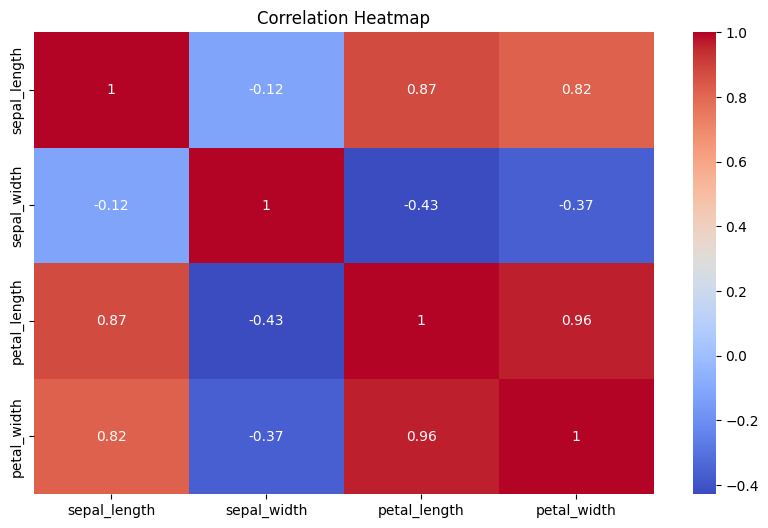

In [26]:
#Matrice de Correlation

plt.figure(figsize=(10, 6))
sns.heatmap(data[col].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [27]:
# Séparation des données

X = data.drop('species', axis=1)
y = data.species

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix,accuracy_score

In [31]:

pip install lazypredict

In [32]:
# Methode simple de Chercher un meilleur modele

from lazypredict.Supervised import LazyClassifier
model = LazyClassifier()
models,predictions = model.fit(X_train, X_test, y_train, y_test)

 90%|████████▉ | 26/29 [00:00<00:00, 29.86it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

100%|██████████| 29/29 [00:01<00:00, 24.10it/s]


In [33]:
# Afficher les modeles

print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
AdaBoostClassifier                 1.00               1.00    None      1.00   
LabelSpreading                     1.00               1.00    None      1.00   
SVC                                1.00               1.00    None      1.00   
SGDClassifier                      1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
PassiveAggressiveClassifier        1.00               1.00    None      1.00   
NuSVC                              1.00               1.00    None      1.00   
LogisticRegression                 1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
LinearDiscriminantAnalysis         1.00               1.00    None      1.00   
LinearSVC                          1.00 

In [34]:
# Afficher les 5 meilleur modele

models.head().sort_values(by='Time Taken', ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,1.00,1.00,None,1.00,0.17
AdaBoostClassifier,1.00,1.00,None,1.00,0.12
LabelSpreading,1.00,1.00,None,1.00,0.02
SGDClassifier,1.00,1.00,None,1.00,0.02
SVC,1.00,1.00,None,1.00,0.01


In [35]:
# Choix du modele

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
score = rf.score(X_test, y_test)
print(score)

1.0


In [37]:
accuracy_score(y_test, rf.predict(X_test))

1.0

In [38]:
confusion_matrix(y_test, rf.predict(X_test))

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

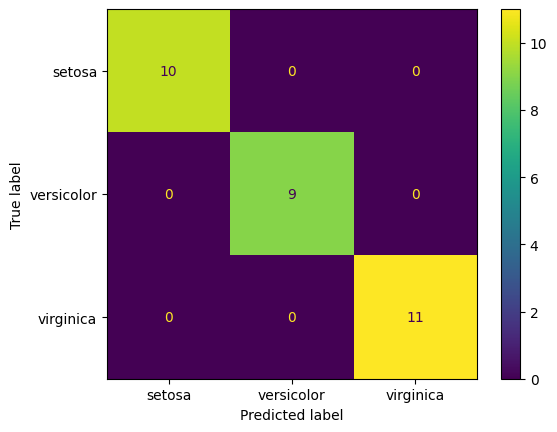

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [40]:
rf.feature_importances_

array([0.09119411, 0.02893087, 0.46697752, 0.41289751])

In [41]:
pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values(by='importance', ascending=False)

,importance
petal_length,0.47
petal_width,0.41
sepal_length,0.09
sepal_width,0.03


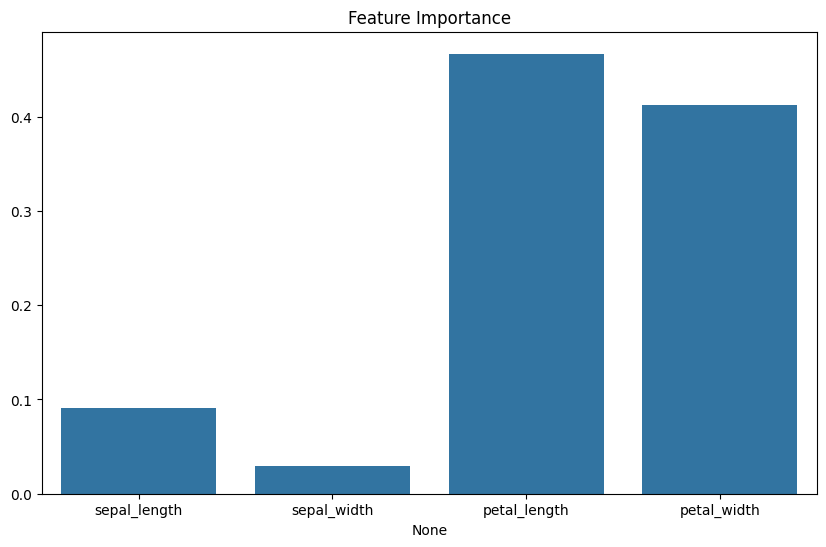

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(y=rf.feature_importances_, x=X.columns)
plt.title('Feature Importance')
plt.show()

In [43]:
rf.predict(X_test)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [44]:
rf.predict([[5.1, 3.5, 1.4, 0.2]])

array(['setosa'], dtype=object)

In [49]:
import joblib
joblib.dump(rf, 'iris_model.pkl')

['iris_model.pkl']

In [50]:
from sklearn.model_selection import GridSearchCV
# Définir la grille de paramètres pour Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Meilleurs paramètres et meilleure précision
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
0.9583333333333334
